In [33]:
import modulo_toolbox as mtb
import os
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier, XGBRegressor

df = mtb.pd.read_csv("./data/BankChurners.csv")

In [35]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [36]:
df.head(15)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0   768805383  Existing Customer            45      M                3   
1   818770008  Existing Customer            49      F                5   
2   713982108  Existing Customer            51      M                3   
3   769911858  Existing Customer            40      F                4   
4   709106358  Existing Customer            40      M                3   
5   713061558  Existing Customer            44      M                2   
6   810347208  Existing Customer            51      M                4   
7   818906208  Existing Customer            32      M                0   
8   710930508  Existing Customer            37      M                3   
9   719661558  Existing Customer            48      M                2   
10  708790833  Existing Customer            42      M                5   
11  710821833  Existing Customer            65      M                1   
12  710599683  Existing Customer            56      M                1   
13  816082233  Existing Customer            35      M                3   
14  712396908  Existing Customer            57      F                2   

   Education_Level Marital_Status Income_Category Card_Category  \
0      High School        Married     $60K - $80K          Blue   
1         Graduate         Single  Less than $40K          Blue   
2         Graduate        Married    $80K - $120K          Blue   
3      High School        Unknown  Less than $40K          Blue   
4       Uneducated        Married     $60K - $80K          Blue   
5         Graduate        Married     $40K - $60K          Blue   
6          Unknown        Married         $120K +          Gold   
7      High School        Unknown     $60K - $80K        Silver   
8       Uneducated         Single     $60K - $80K          Blue   
9         Graduate         Single    $80K - $120K          Blue   
10      Uneducated        Unknown         $120K +          Blue   
11         Unknown        Married     $40K - $60K          Blue   
12         College         Single    $80K - $120K          Blue   
13        Graduate        Unknown     $60K - $80K          Blue   
14        Graduate        Married  Less than $40K          Blue   

    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0               39  ...                       1                      3   
1               44  ...                       1                      2   
2               36  ...                       1                      0   
3               34  ...                       4                      1   
4               21  ...                       1                      0   
5               36  ...                       1                      2   
6               46  ...                       1                      3   
7               27  ...                       2                      2   
8               36  ...                       2                      0   
9               36  ...                       3                      3   
10              31  ...                       3                      2   
11              54  ...                       2                      3   
12              36  ...                       6                      0   
13              30  ...                       1                      3   
14              48  ...                       2                      2   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0        12691.0                  777          11914.0                 1.335   
1         8256.0                  864           7392.0                 1.541   
2         3418.0                    0           3418.0                 2.594   
3         3313.0                 2517            796.0                 1.405   
4         4716.0                    0           4716.0                 2.175   
5         4010.0                 1247           2763.0                 1.376   
6

In [37]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [39]:
mtb.tb.describe_df(df)

CLIENTNUM Attrition_Flag Customer_Age    Gender  \
Data type                   int64         object        int64    object   
Percent missing (%)           0.0            0.0          0.0       0.0   
Unique values               10127              2           45         2   
Cardinality percent (%)     100.0       0.019749     0.444357  0.019749   

                        Dependent_count Education_Level Marital_Status  \
Data type                         int64          object         object   
Percent missing (%)                 0.0             0.0            0.0   
Unique values                         6               7              4   
Cardinality percent (%)        0.059248        0.069122       0.039498   

                        Income_Category Card_Category Months_on_book  ...  \
Data type                        object        object          int64  ...   
Percent missing (%)                 0.0           0.0            0.0  ...   
Unique values                         6             4             44  ...   
Cardinality percent (%)        0.059248      0.039498       0.434482  ...   

                        Months_Inactive_12_mon Contacts_Count_12_mon  \
Data type                                int64                 int64   
Percent missing (%)                        0.0                   0.0   
Unique values                                7                     7   
Cardinality percent (%)               0.069122              0.069122   

                        Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy  \
Data type                    float64               int64         float64   
Percent missing (%)              0.0                 0.0             0.0   
Unique values                   6205                1974            6813   
Cardinality percent (%)    61.271848           19.492446         67.2756   

                        Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct  \
Data type                            float64           int64          int64   
Percent missing (%)                      0.0             0.0            0.0   
Unique values                           1158            5033            126   
Cardinality percent (%)            11.434778       49.698825       1.244199   

                        Total_Ct_Chng_Q4_Q1 Avg_Utilization_Ratio  
Data type                           float64               float64  
Percent missing (%)                     0.0                   0.0  
Unique values                           830                   964  
Cardinality percent (%)            8.195912              9.519107  

[4 rows x 21 columns]

In [40]:
df.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [41]:
mtb.tb.tipifica_variables(df,7,0.7)

nombre_variable      tipo_sugerido
0                  CLIENTNUM  Numerica Continua
1             Attrition_Flag            Binaria
2               Customer_Age  Numerica Discreta
3                     Gender            Binaria
4            Dependent_count         Categórica
5            Education_Level  Numerica Discreta
6             Marital_Status         Categórica
7            Income_Category         Categórica
8              Card_Category         Categórica
9             Months_on_book  Numerica Discreta
10  Total_Relationship_Count         Categórica
11    Months_Inactive_12_mon  Numerica Discreta
12     Contacts_Count_12_mon  Numerica Discreta
13              Credit_Limit  Numerica Discreta
14       Total_Revolving_Bal  Numerica Discreta
15           Avg_Open_To_Buy  Numerica Discreta
16      Total_Amt_Chng_Q4_Q1  Numerica Discreta
17           Total_Trans_Amt  Numerica Discreta
18            Total_Trans_Ct  Numerica Discreta
19       Total_Ct_Chng_Q4_Q1  Numerica Discreta
20     Avg_Utilization_Ratio  Numerica Discreta

In [42]:
target = "Attrition_Flag"

In [43]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42, stratify=df["Attrition_Flag"])

In [44]:
train_set[target].value_counts()

Attrition_Flag
Existing Customer    6799
Attrited Customer    1302
Name: count, dtype: int64

In [45]:
train_set.shape

(8101, 21)

In [46]:
numeric_features = mtb.get_features_num_classification(train_set,target) # enma

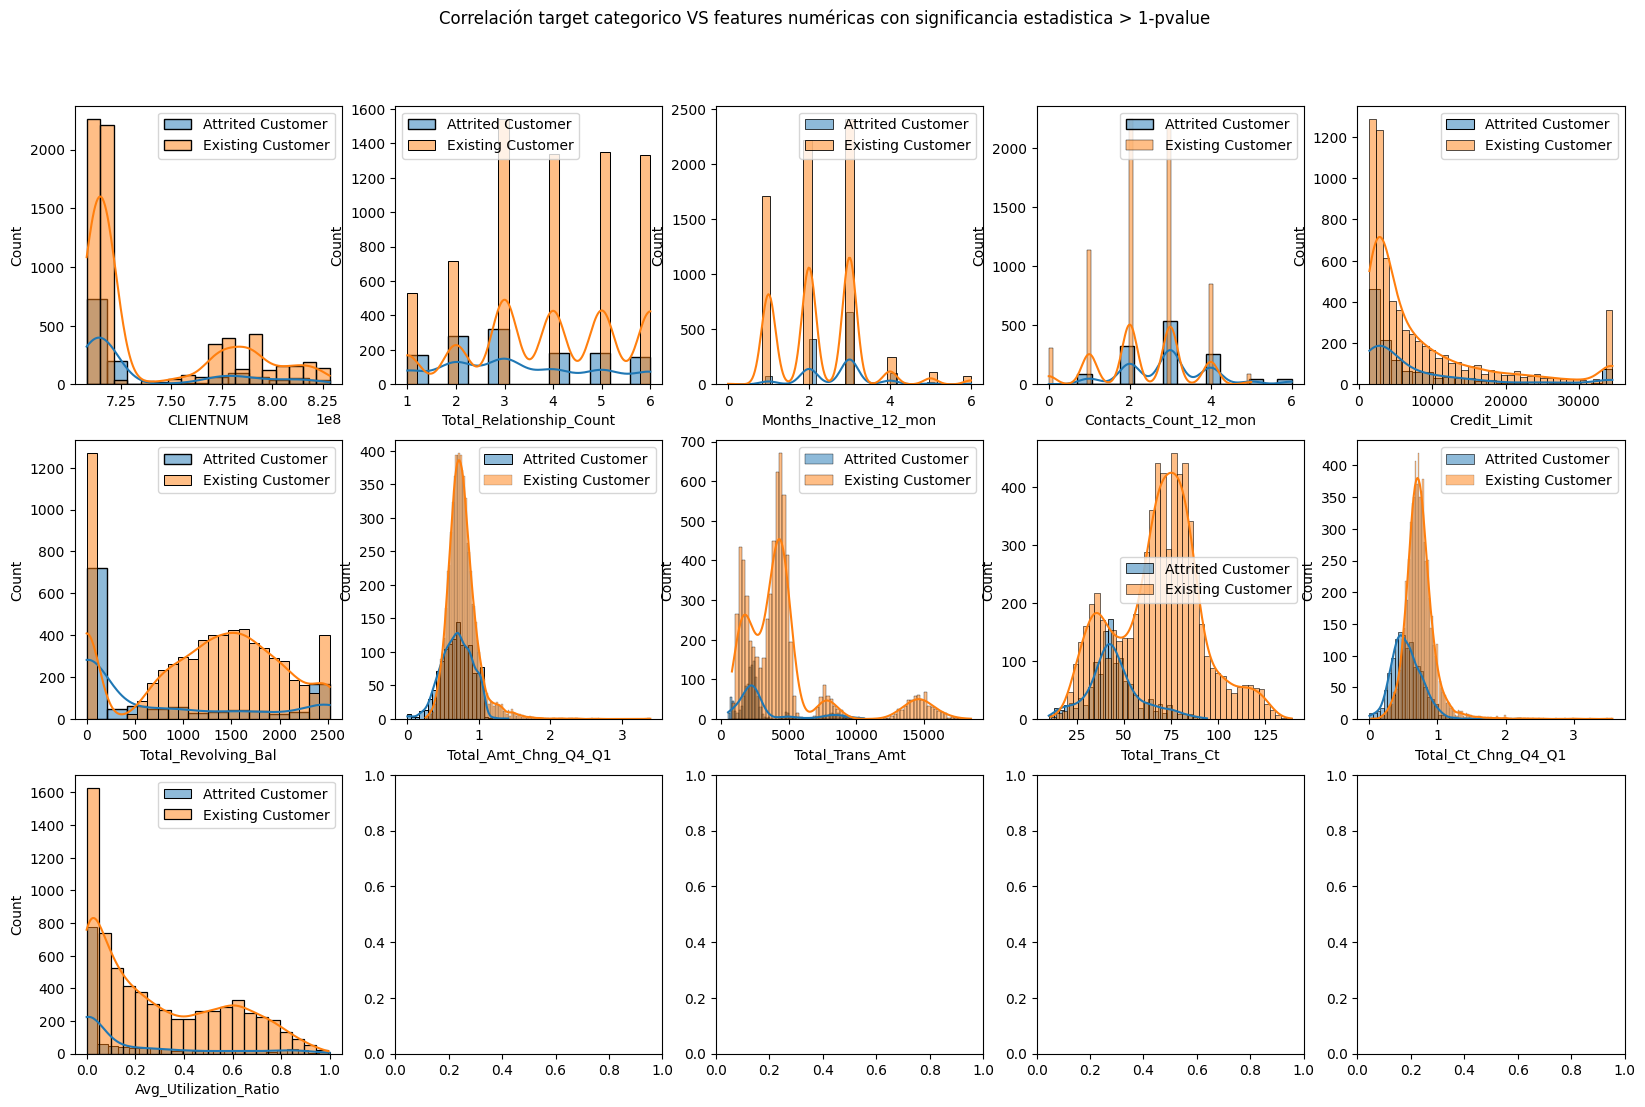

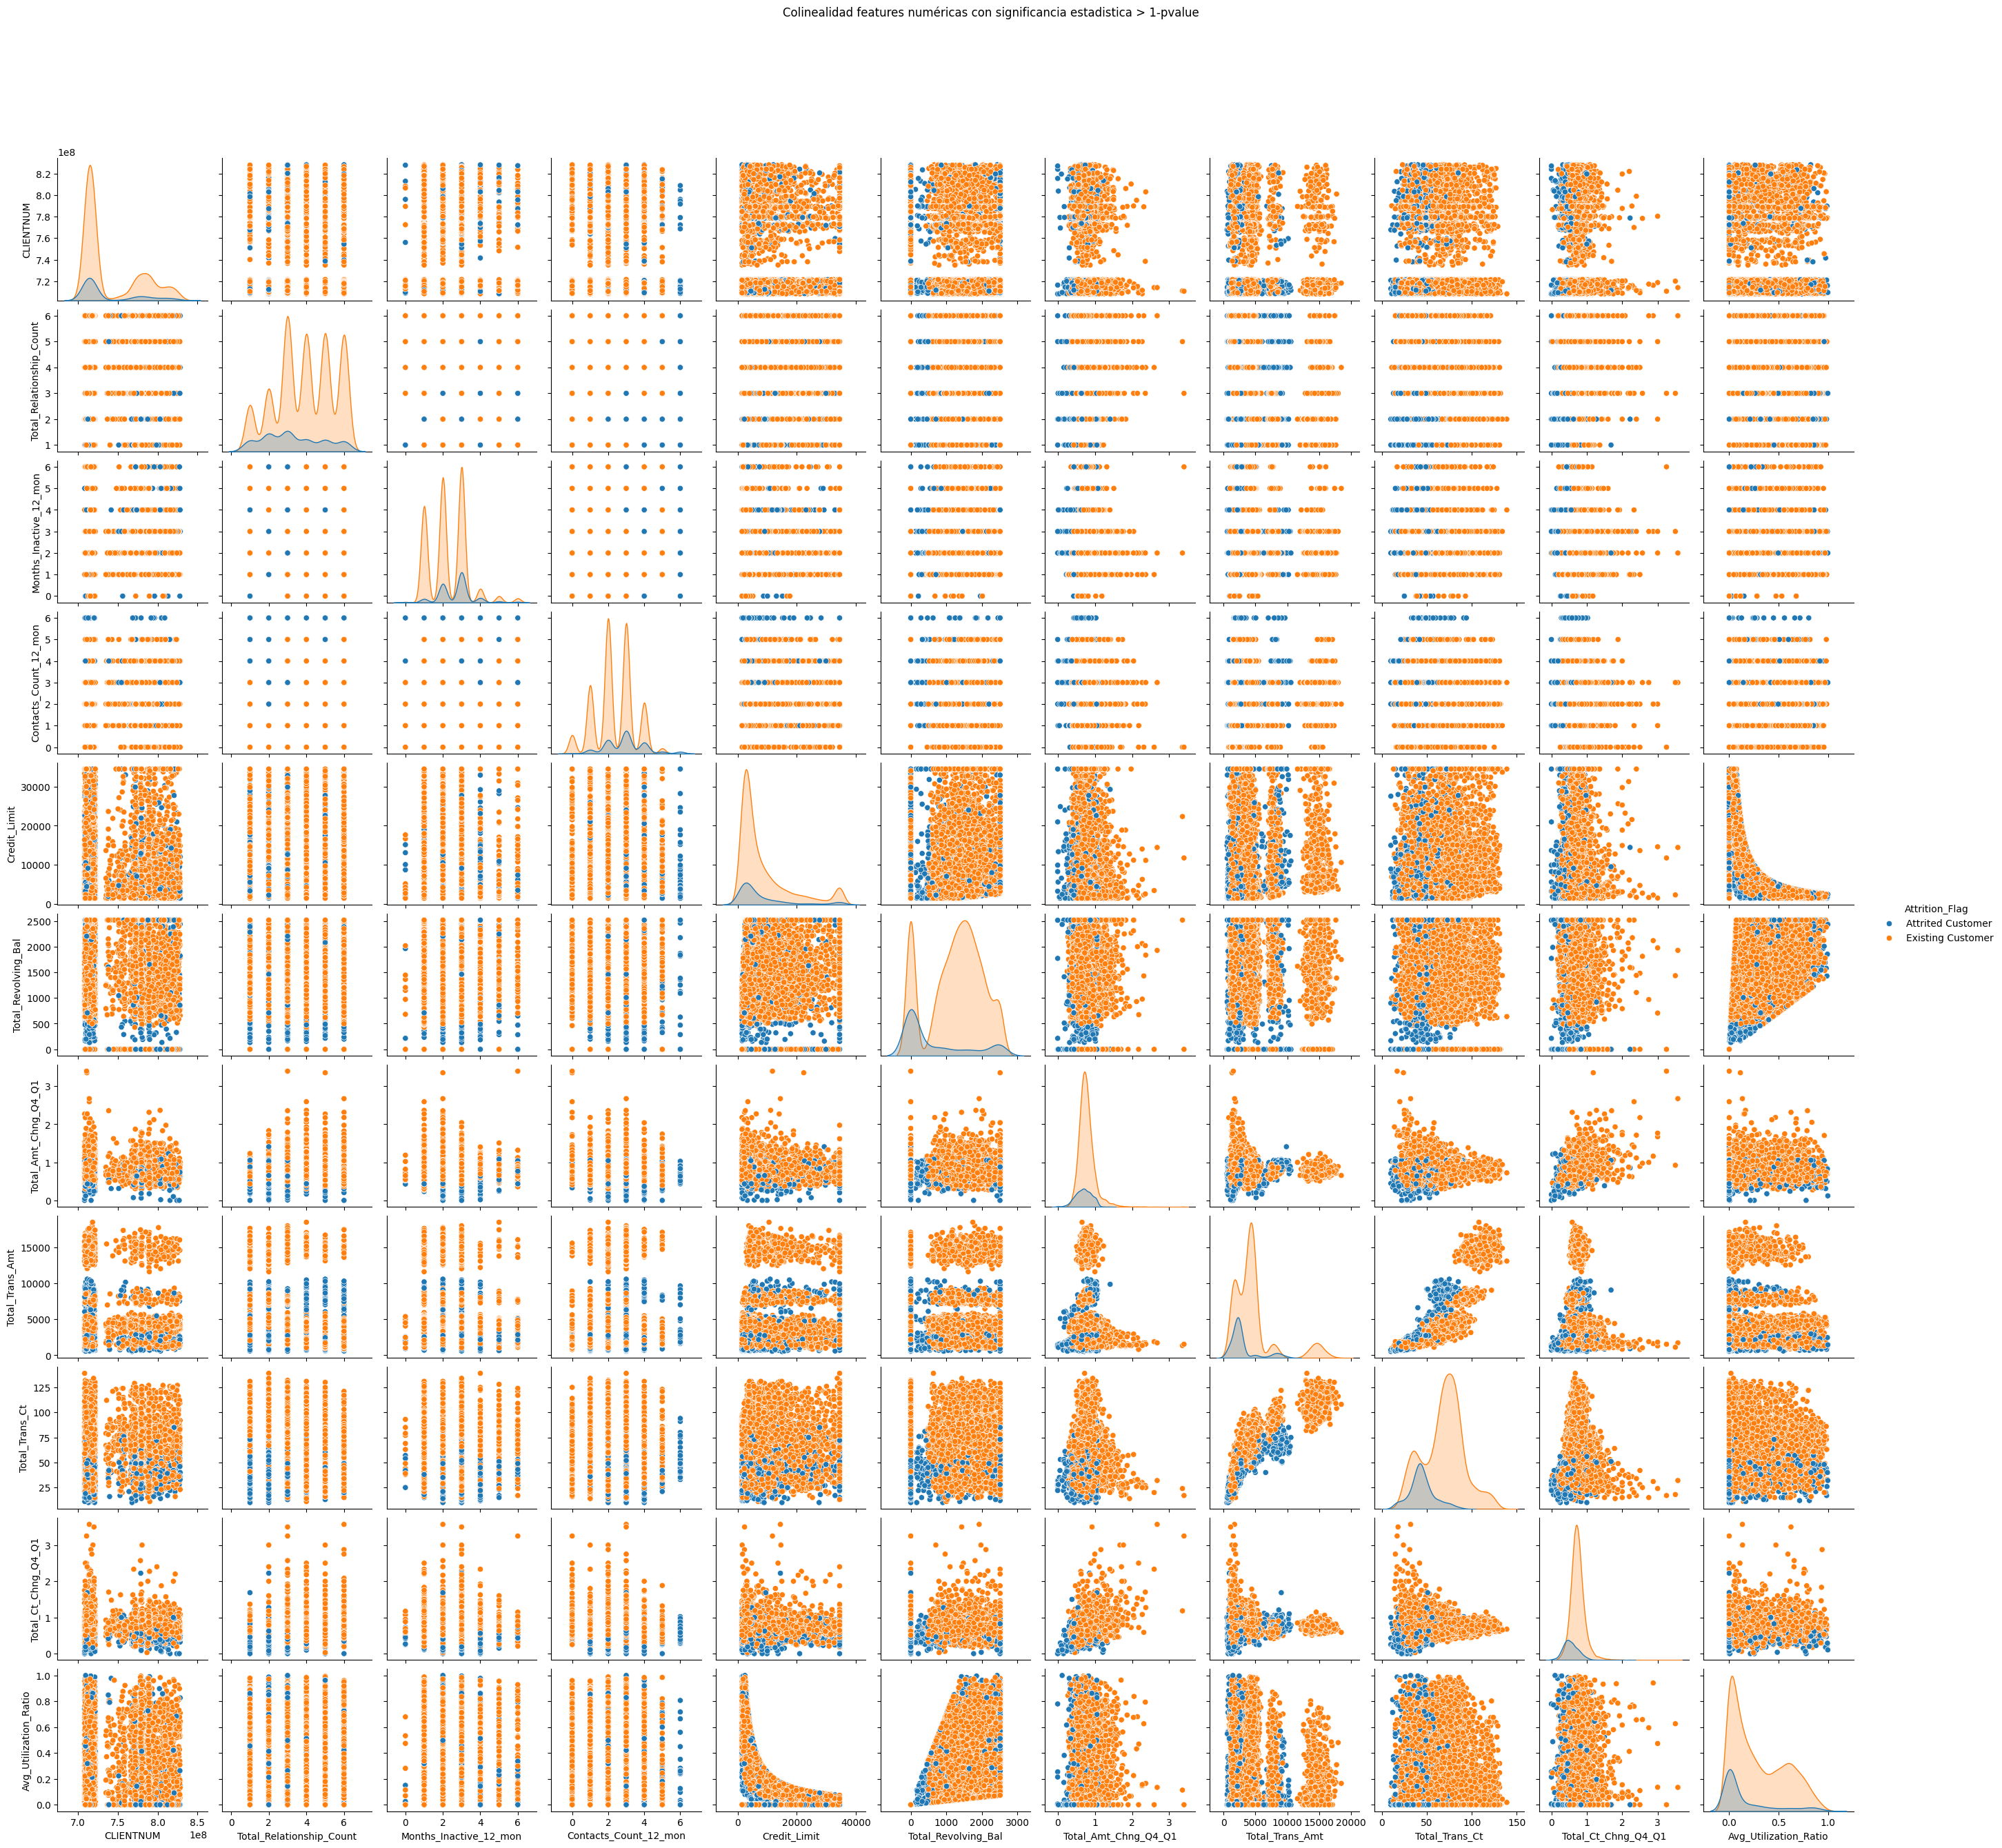

['CLIENTNUM',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [47]:
mtb.plot_features_num_classification(train_set,target) # fran

In [ ]:
# estas columnas generaban overfiting

df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis= 1)

In [48]:
numeric_features

['CLIENTNUM',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [49]:
categorical_features = mtb.get_features_cat_classification(train_set,target) # naim



<Figure size 1000x600 with 0 Axes>

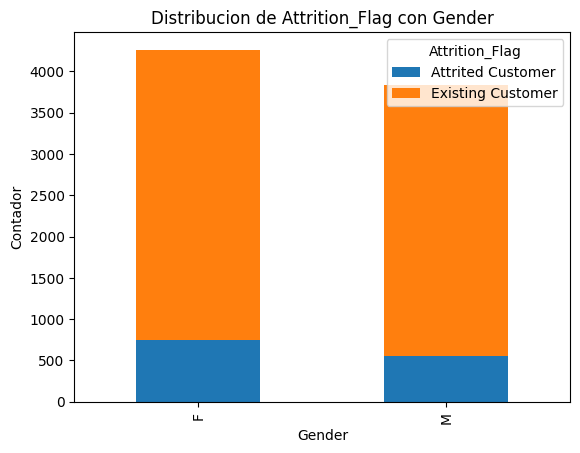

<Figure size 1000x600 with 0 Axes>

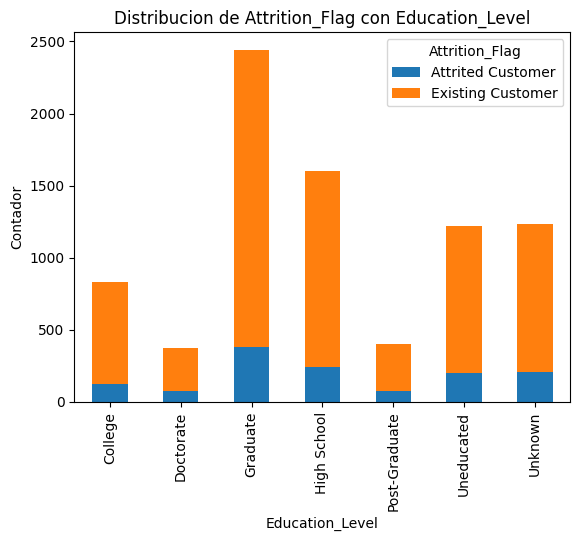

<Figure size 1000x600 with 0 Axes>

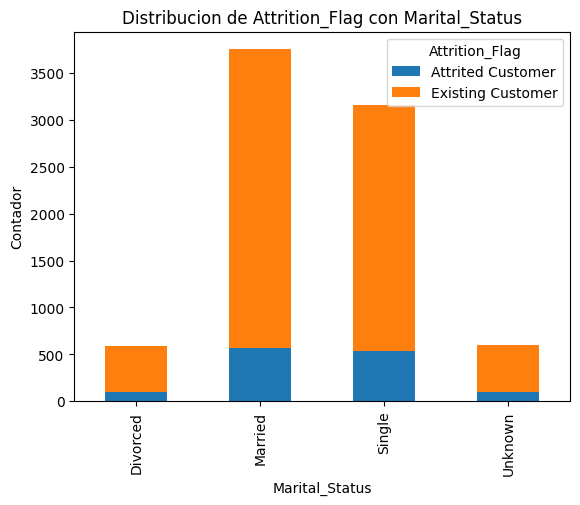

<Figure size 1000x600 with 0 Axes>

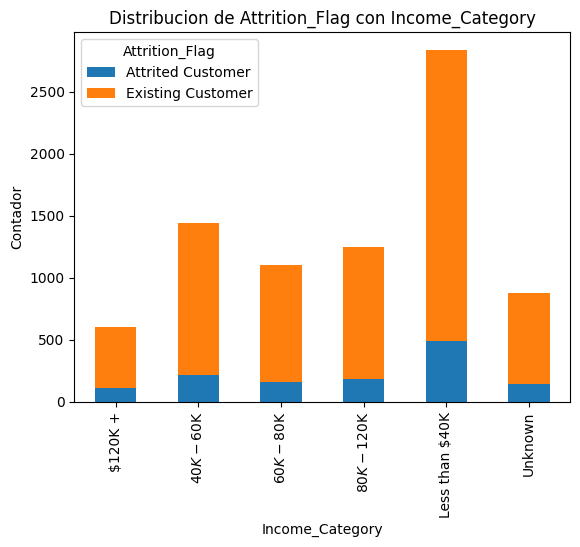

<Figure size 1000x600 with 0 Axes>

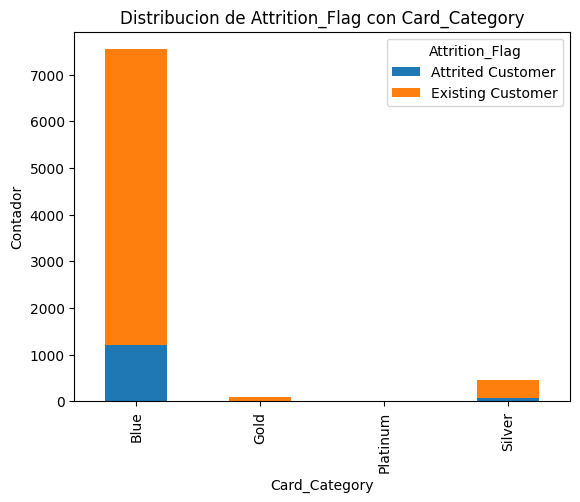

In [50]:
mtb.plot_features_cat_classification(train_set,target) # unai

In [51]:
categorical_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [52]:
# Preprocesamiento de características numéricas y categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Crear el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])


In [53]:
X = df[numeric_features + categorical_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
y_train

9066    Existing Customer
5814    Attrited Customer
792     Existing Customer
1791    Existing Customer
5011    Existing Customer
              ...        
5734    Attrited Customer
5191    Attrited Customer
5390    Existing Customer
860     Existing Customer
7270    Existing Customer
Name: Attrition_Flag, Length: 8101, dtype: object

In [55]:
# Definir la búsqueda en cuadrícula de parámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth': [4, 6, 8, 10, 12],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)

In [56]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['CLIENTNUM',
                                                                          'Total_Relationship_Count',
                                                                          'Months_Inactive_12_mon',
                                                                          'Contacts_Count_12_mon',
                                                                          'Credit_Limit',
                                                                          'Total_Revolving_Bal',
                                                                          'Total_Amt_Chng_Q4_Q1',
                                                                          'Total_Trans_Amt',
                                                                          'Total_Trans_Ct',
                                                                          'Total_Ct_Chng_Q4_Q1',
                                                                          'Avg_Utilization_Ratio']),
                                                                        ('...
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Income_Category',
                                                                          'Card_Category'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [4, 6, 8, 10, 12],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

In [57]:
print("Mejores parámetros encontrados: ", grid_search.best_params_)
print("Mejor puntuación de validación cruzada: ", grid_search.best_score_)

# Predecir en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Evaluar el rendimiento
print(classification_report(y_test, y_pred))

Mejores parámetros encontrados:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 12, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 300}
Mejor puntuación de validación cruzada:  0.8628346288495617
                   precision    recall  f1-score   support

Attrited Customer       0.91      0.71      0.80       327
Existing Customer       0.95      0.99      0.97      1699

         accuracy                           0.94      2026
        macro avg       0.93      0.85      0.88      2026
     weighted avg       0.94      0.94      0.94      2026



In [58]:
modelo = grid_search.best_estimator_
y_pred = modelo.predict(X_test)
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

Attrited Customer       0.91      0.71      0.80       327
Existing Customer       0.95      0.99      0.97      1699

         accuracy                           0.94      2026
        macro avg       0.93      0.85      0.88      2026
     weighted avg       0.94      0.94      0.94      2026



In [59]:
mtb.eval_model(y_test,y_pred,"classification",["ACCURACY"]) # alber

<class 'list'>
Accuracy: 0.9422507403751234


(0.9422507403751234,)

<class 'list'>
Accuracy: 0.9422507403751234
Precision: 0.9298870443113347
Recall: 0.848265664458136
Confusion Matrix
[[ 232   95]
 [  22 1677]]


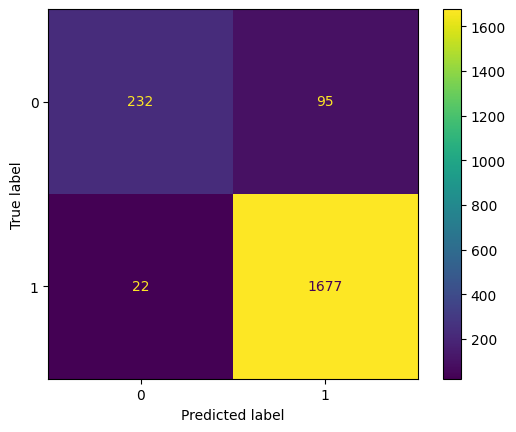

(0.9422507403751234, 0.9298870443113347, 0.848265664458136)

In [60]:
mtb.eval_model(y_test,y_pred,"classification",['ACCURACY', 'PRECISION', 'RECALL', 'CLASS REPORT', 'MATRIX']) # alber